# Import

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import precision_recall_curve
from pickle import dump, load

# Load dataset

In [2]:
path = 'kdd-with-columns.csv'
df = pd.read_csv(path)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [4]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.outcome.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: outcome, dtype: int64

# Split train / test data

In [6]:
normal_df = df[df.outcome == "normal."].drop("outcome", axis=1)
normal_train_df, normal_test_df = train_test_split(normal_df, test_size=0.1, random_state=42)
bad_df = df[df.outcome != "normal."].drop("outcome", axis=1)

In [7]:
# Save samples for test our app performance later
samples_normal = normal_test_df.sample(10)
samples_bad = bad_df.sample(10)
samples = pd.concat((samples_normal, samples_bad), axis=0, ignore_index=True)
samples.to_csv("samples.csv", index=False)

# Preprocess features

In [8]:
object_features = ["protocol_type", "service", "flag"]
numeric_features = [col for col in normal_train_df.columns if col not in object_features]
print(numeric_features)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


### object features

In [9]:
object_encoder = OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=0.05)
object_encoder.fit(normal_train_df[object_features])

OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=0.05)

In [10]:
# Save encoder for use later
with open('object_encoder.pkl', 'wb') as f:
    dump(object_encoder, f)

In [11]:
with open('object_encoder.pkl', 'rb') as f:
    object_encoder = load(f)

In [12]:
def preprocess_object_features(df):
    arr = object_encoder.transform(df[object_features]).toarray()
    new_df = pd.DataFrame(arr, columns=object_encoder.get_feature_names(), index=df.index)
    df = df.drop(object_features, axis=1)
    df = pd.concat((df, new_df), axis=1)
    return df

### numeric features

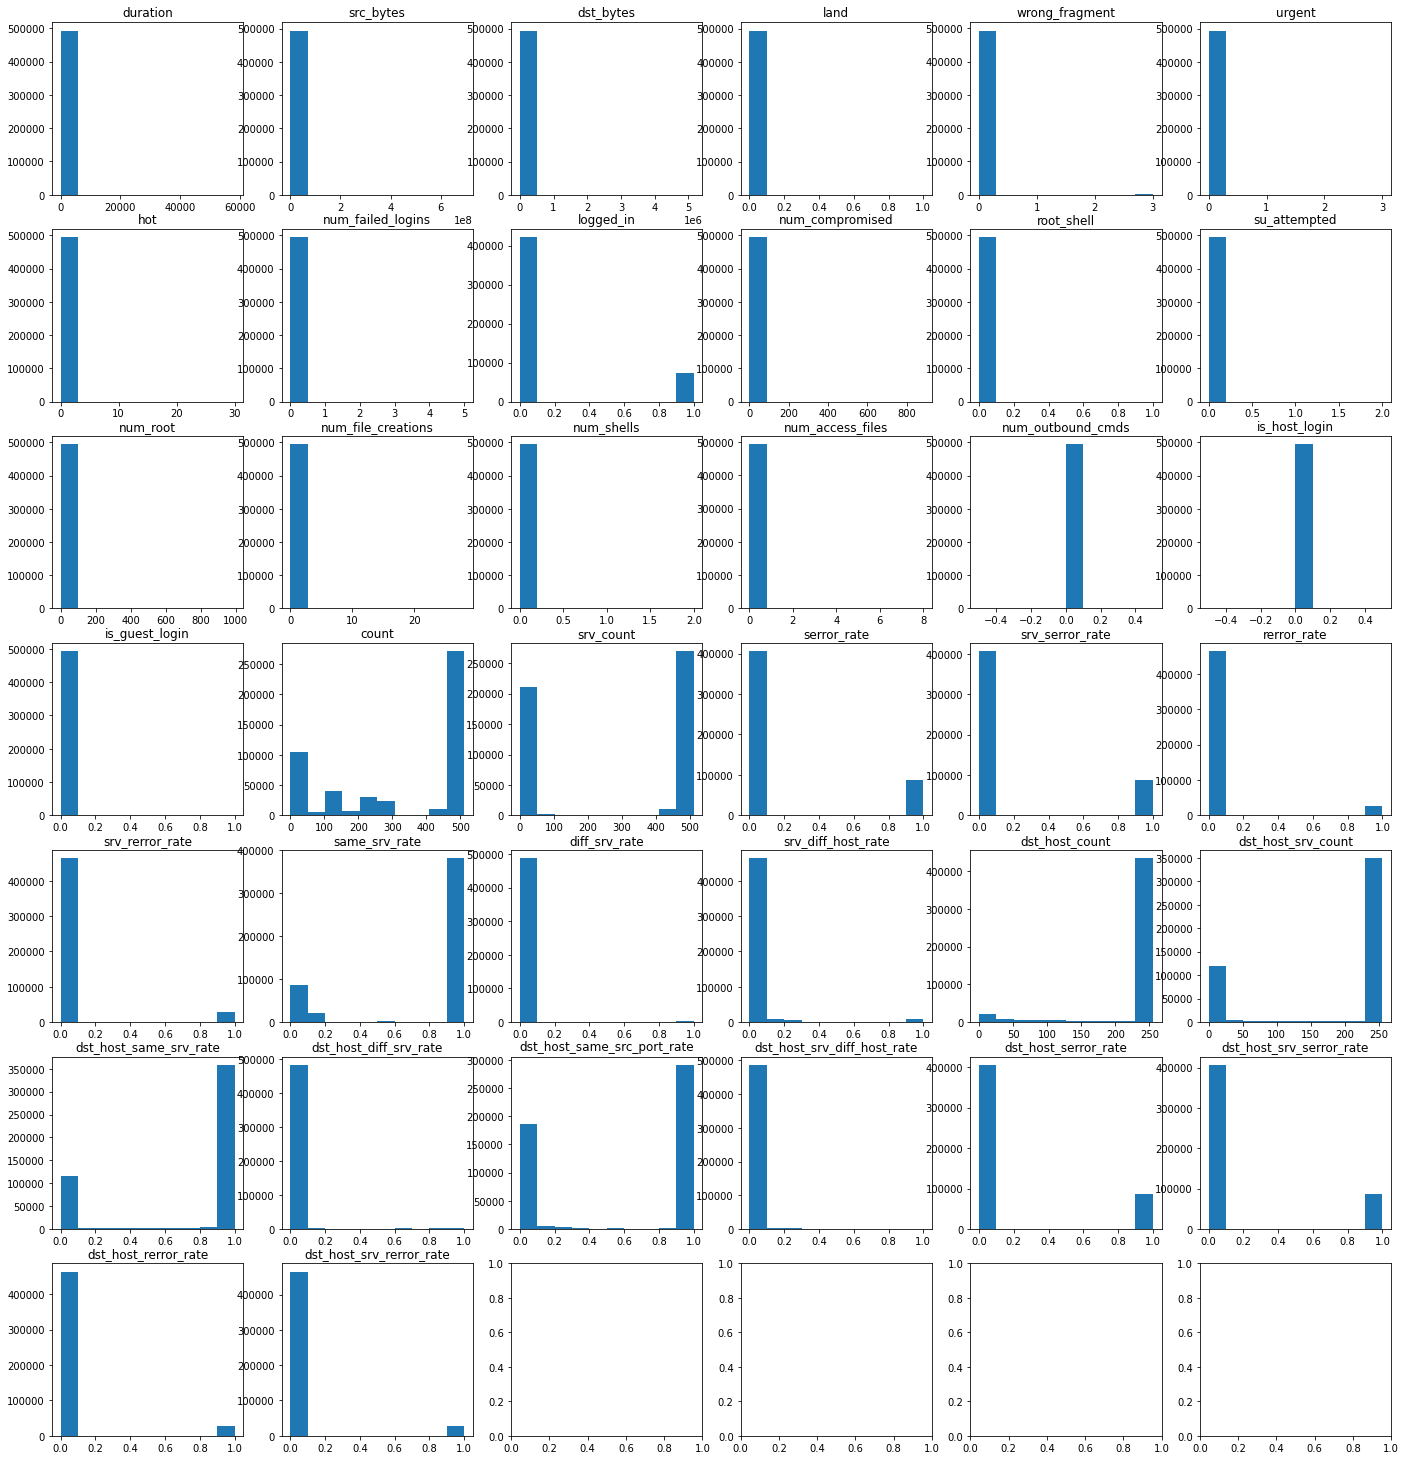

In [13]:
fig, axs = plt.subplots(7,6)
fig.set_figwidth(24)
fig.set_figheight(26)

for i in range(7):
    for j in range(6):
        if i * 6 + j >= 38:
            pass
        else:
            feature = numeric_features[i*6 + j]
            axs[i, j].hist(df[feature])
            axs[i, j].set_title(feature)

In [14]:
numeric_encoder = MinMaxScaler(feature_range=(0,1))
numeric_encoder.fit(normal_train_df[numeric_features])

MinMaxScaler()

In [15]:
# Save this scaler for use later
with open('numeric_encoder.pkl', 'wb') as f:
    dump(numeric_encoder, f)
with open('numeric_encoder.pkl', 'rb') as f:
    numeric_encoder = load(f)

In [16]:
def preprocess_numeric_features(df):
    arr = numeric_encoder.transform(df[numeric_features])
    new_df = pd.DataFrame(arr, columns=numeric_features, index=df.index)
    df = df.drop(numeric_features, axis=1)
    df = pd.concat((df, new_df), axis=1)
    return df

In [17]:
# preprocessing pipeline
def preprocessing_df(df):
    df = preprocess_object_features(df)
    df = preprocess_numeric_features(df)
    return df

In [18]:
normal_train_df = preprocessing_df(normal_train_df)
normal_test_df = preprocessing_df(normal_test_df)
bad_df = preprocessing_df(bad_df)

D:\3. Projects\6. Anomalies Detection\anomalies_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\3. Projects\6. Anomalies Detection\anomalies_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\3. Projects\6. Anomalies Detection\anomalies_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Build & train auto encoder model

In [19]:
encoder = keras.Sequential([
    keras.layers.Dense(25, activation='relu', kernel_initializer='he_normal', input_shape=(50,)),
    keras.layers.Dense(3, activation='relu', kernel_initializer='he_normal')
])
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 1,353
Trainable params: 1,353
Non-trainable params: 0
_________________________________________________________________


In [20]:
decoder = keras.Sequential([
    keras.layers.Dense(25, activation='relu', kernel_initializer='he_normal', input_shape=(3,)),
    keras.layers.Dense(50)
])
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                100       
                                                                 
 dense_3 (Dense)             (None, 50)                1300      
                                                                 
Total params: 1,400
Trainable params: 1,400
Non-trainable params: 0
_________________________________________________________________


In [21]:
model = keras.Sequential([
    encoder,
    decoder
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 1353      
                                                                 
 sequential_1 (Sequential)   (None, 50)                1400      
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [22]:
keras.backend.clear_session()
tf.random.set_seed(28)

early_stopping_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, min_delta=1e-6)
optimizer = keras.optimizers.Adam(learning_rate=3e-4)
model.compile(loss='mse', optimizer=optimizer)
history = model.fit(normal_train_df, normal_train_df, epochs=1000, batch_size=32, callbacks=[early_stopping_callback])

Epoch 1/1000
2736/2736 [==============================] - 4s 1ms/step - loss: 0.0258
Epoch 2/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0079
Epoch 3/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0056
Epoch 4/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0043
Epoch 5/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0041
Epoch 6/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0039
Epoch 7/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0038
Epoch 8/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0037
Epoch 9/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0037
Epoch 10/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0036
Epoch 11/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0034
Epoch 12/1000
2736/2736 [==============================] - 3s 1

2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 97/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 98/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 99/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 100/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 101/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 102/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 103/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 104/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 105/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 106/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0016
Epoch 107/1000
2736/2736 [==============================] - 3

2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 191/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 192/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 193/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 194/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 195/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 196/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 197/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 198/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 199/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 200/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 201/1000
2736/2736 [==============================] 

2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 285/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 286/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 287/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 288/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 289/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 290/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 291/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 292/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 293/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 294/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 295/1000
2736/2736 [==============================] 

2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 379/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 380/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 381/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 382/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 383/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 384/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 385/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 386/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 387/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 388/1000
2736/2736 [==============================] - 3s 1ms/step - loss: 0.0012
Epoch 389/1000
2736/2736 [==============================] 

In [23]:
# Save model for use later
model.save('model.h5')
model = keras.models.load_model('model.h5')

# Find the threshold

In [28]:
test_pred = model.predict(normal_test_df)
np.mean((test_pred - np.array(normal_test_df))**2)

304/304 [==============================] - 0s 815us/step


0.0011610520609337952

In [29]:
bad_pred = model.predict(bad_df)
np.mean((bad_pred - np.array(bad_df))**2)

12399/12399 [==============================] - 10s 808us/step


0.2571103880491308

In [30]:
train_pred = model.predict(normal_train_df)

2736/2736 [==============================] - 2s 787us/step


In [31]:
test_errors = np.mean((test_pred - np.array(normal_test_df))**2, axis=1)
test_errors.shape

(9728,)

In [32]:
train_errors = np.mean((train_pred - np.array(normal_train_df))**2, axis=1)
train_errors.shape

(87550,)

In [36]:
normal_errors = np.r_[test_errors, train_errors]
normal_errors.shape

(97278,)

In [37]:
bad_errors = np.mean((bad_pred - np.array(bad_df))**2, axis=1)
bad_errors.shape

(396743,)

In [38]:
errors = np.r_[normal_errors, bad_errors]

In [39]:
true_values = np.r_[np.zeros_like(normal_errors), np.ones_like(bad_errors)]

In [43]:
precision, recall, thresholds = precision_recall_curve(true_values, errors)

(0.0, 0.0125)

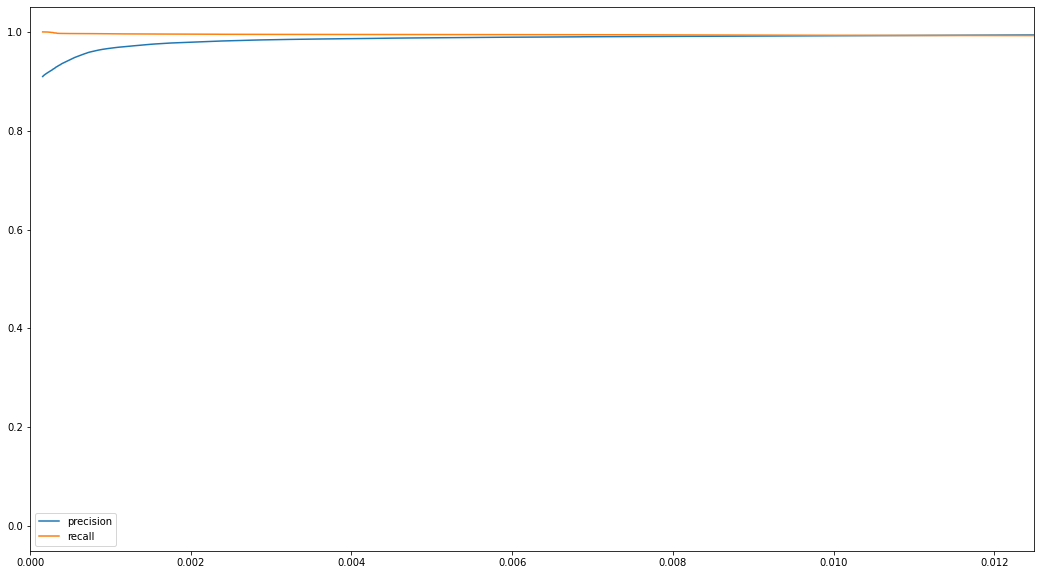

In [62]:
plt.figure(figsize=(18,10))
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.legend()
plt.xlim(0,0.0125)

In [141]:
threshold = 0.004

In [142]:
idx = np.where(thresholds > threshold)[0][0]

In [143]:
np.where(thresholds > threshold)[0][0]

31842

In [144]:
precision[idx]

0.9863917185672442

In [145]:
recall[idx]

0.9947976397819244

## we will choose threshold = 0.004, according to precision 0.986 and recall 0.995